## Machine Learning Assignment 2 : kNN Neighbors 

In [5]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    @staticmethod
    def normalize(x,x_train):
        ## performs normalization of the given dataframe using maximum absolute scaling
        ## x_scaled = x_i/max(|x_i|)
        x_normalized = x.copy()

        
        for i in x_normalized : 
            x_normalized[i] = x_normalized[i] / x_train[i].max()
        
        return x_normalized
    
    
    def getProbs(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = [i /self.k for i in predictions]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test
           
            
        
       
    def getPrediction(x_test): 
        pr = np.zeros(len(x_test.index))
        predictions = pd.DataFrame(pr)
        sum_y= 0
        for i in range(0,self.k):
            sum_y += x_test.loc(i,['class'])
        
        for row in (0,self.k):
            predictions[row] = 1/self.k * sum_y
        return predictions

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.random import random
from sklearn.metrics import accuracy_score

## Not normalized Hold-out Testing for Glass Data

Text(0, 0.5, 'Accuracy')

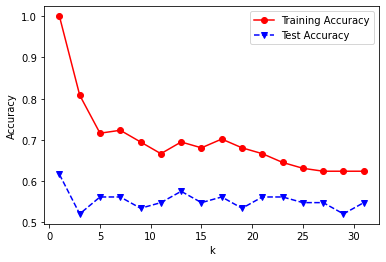

In [3]:


##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

index = 0
    
    
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification((X_train))
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')


## Normalized Hold-out Testing for Glass Data

Text(0, 0.5, 'Accuracy')

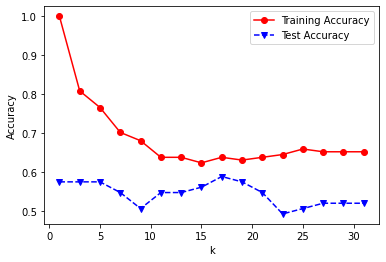

In [4]:
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
X_train_n = kNN.normalize(x = X_train,x_train = X_train)
X_test_n = kNN.normalize(x = X_test, x_train = X_train)
index = 0
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train_n, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train_n)
    Y_predTest = clf.getDiscreteClassification(X_test_n)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

## Not normalized Hold-out Test on  Diabetes Data

Text(0, 0.5, 'Accuracy')

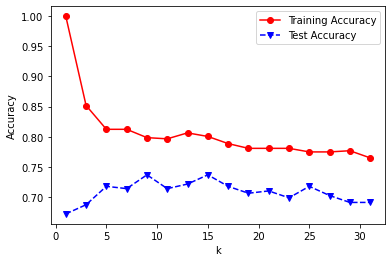

In [5]:
data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))

index = 0
    
    
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification((X_train))
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')





## Normalized Hold-out Testing For Diabetes Data

Text(0, 0.5, 'Accuracy')

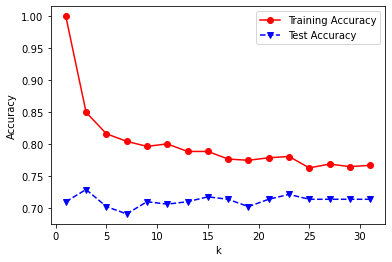

In [6]:
## with normalized data
index = 0
X_train_n = kNN.normalize(x = X_train,x_train = X_train)
X_test_n = kNN.normalize(x = X_test,x_train = X_train)
for k in k_range:
    clf = kNN(k)
    clf.fit(X_train_n,Y_train)
    y_predTrain = clf.getDiscreteClassification(X_train_n)
    y_predTest  = clf.getDiscreteClassification(X_test_n)
    trainAcc[index] = accuracy_score(Y_train,y_predTrain)
    testAcc[index] = accuracy_score(Y_test,y_predTest)
    index +=1
#plot results
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')


> As seen in the plotted results of normalized and not-normalized hold -out testing for both datasets above, we can see that there is an increase in the accuracy rates as in the normalized results it is possible to see more similar patterns between the test and training sets for both data, even if the difference is not that obvious. 


## Hold-out Testing for Differing Values of Exp

### Not normalized Glass Data

<ipython-input-1-c5fc37ada938>:67: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

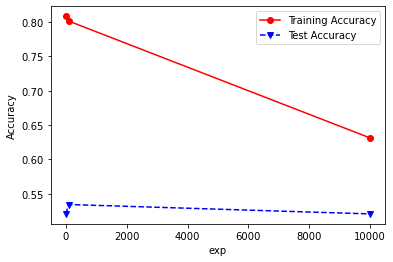

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))

index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


### Normalized Glass Data

<ipython-input-1-c5fc37ada938>:67: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

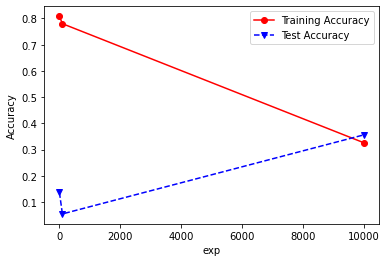

In [14]:
index = 0 
X_train = kNN.normalize(X_train,X_train)
X_test = kNN.normalize(X_test,X_train)
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

### Not normalized Diabetes Data

<ipython-input-1-c5fc37ada938>:67: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

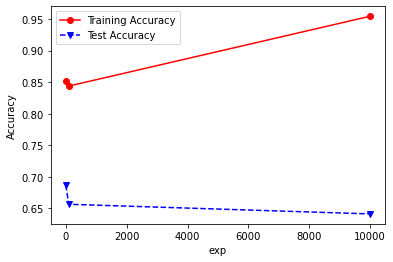

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))

index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

### Normalized Diabetes Data

<ipython-input-1-c5fc37ada938>:67: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

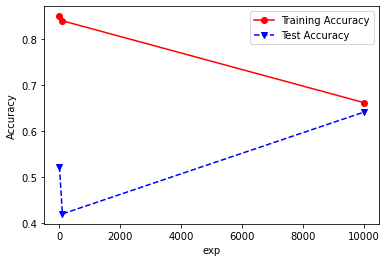

In [19]:
index = 0 

for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(clf.normalize(X_train,X_train))
    Y_predTest = clf.getDiscreteClassification(clf.normalize(X_test,X_train))
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

> As seen in the plotted results above, for both not normalized data, when exponent has a too small or too large value overfitting increases, as there is a wide gap between training and test sets for both data. 
However, when the data is normalized it is possible to observe that as the exponent increases overfitting of the data decreases, however there is an unexpected behavior as test accuracy of normalized data increases and the accuracy of training decreases.

## Task C : Getting Class probabilities

In [9]:
data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
for k in k_range:
    clf = kNN(k)
    clf.fit(X_train,Y_train)
    y_predTrain = clf.getProbs(X_train)
    y_predTest  = clf.getProbs(X_test)
    ##it looks really ugly when the probabilities are printed 
    ## if you would like to test it you can uncomment print
    print(y_predTrain)

[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]
[[1.0], [0.6

[[1.0], [0.5555555555555556, 0.4444444444444444], [0.5555555555555556, 0.4444444444444444], [1.0], [0.7777777777777778, 0.1111111111111111, 0.1111111111111111], [0.4444444444444444, 0.2222222222222222, 0.2222222222222222, 0.1111111111111111], [0.5555555555555556, 0.3333333333333333, 0.1111111111111111], [0.6666666666666666, 0.3333333333333333], [0.8888888888888888, 0.1111111111111111], [0.8888888888888888, 0.1111111111111111], [0.6666666666666666, 0.3333333333333333], [0.4444444444444444, 0.2222222222222222, 0.2222222222222222, 0.1111111111111111], [0.7777777777777778, 0.2222222222222222], [0.6666666666666666, 0.3333333333333333], [0.7777777777777778, 0.1111111111111111, 0.1111111111111111], [0.6666666666666666, 0.3333333333333333], [1.0], [0.6666666666666666, 0.2222222222222222, 0.1111111111111111], [0.3333333333333333, 0.3333333333333333, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [1.0], [0.8888888888888888, 0.1111111111111111], [0.6666666666666666, 0.33333333333333

[[1.0], [0.5384615384615384, 0.38461538461538464, 0.07692307692307693], [0.46153846153846156, 0.38461538461538464, 0.15384615384615385], [1.0], [0.6923076923076923, 0.15384615384615385, 0.15384615384615385], [0.38461538461538464, 0.3076923076923077, 0.15384615384615385, 0.15384615384615385], [0.46153846153846156, 0.46153846153846156, 0.07692307692307693], [0.7692307692307693, 0.23076923076923078], [0.7692307692307693, 0.15384615384615385, 0.07692307692307693], [0.9230769230769231, 0.07692307692307693], [0.7692307692307693, 0.23076923076923078], [0.38461538461538464, 0.38461538461538464, 0.15384615384615385, 0.07692307692307693], [0.6153846153846154, 0.23076923076923078, 0.07692307692307693, 0.07692307692307693], [0.5384615384615384, 0.46153846153846156], [0.8461538461538461, 0.07692307692307693, 0.07692307692307693], [0.6923076923076923, 0.3076923076923077], [1.0], [0.6923076923076923, 0.15384615384615385, 0.15384615384615385], [0.38461538461538464, 0.23076923076923078, 0.1538461538461

[[0.9411764705882353, 0.058823529411764705], [0.47058823529411764, 0.4117647058823529, 0.11764705882352941], [0.5294117647058824, 0.35294117647058826, 0.11764705882352941], [1.0], [0.6470588235294118, 0.17647058823529413, 0.17647058823529413], [0.47058823529411764, 0.29411764705882354, 0.11764705882352941, 0.11764705882352941], [0.47058823529411764, 0.47058823529411764, 0.058823529411764705], [0.8235294117647058, 0.17647058823529413], [0.7058823529411765, 0.23529411764705882, 0.058823529411764705], [0.7647058823529411, 0.23529411764705882], [0.6470588235294118, 0.29411764705882354, 0.058823529411764705], [0.4117647058823529, 0.35294117647058826, 0.17647058823529413, 0.058823529411764705], [0.5294117647058824, 0.29411764705882354, 0.11764705882352941, 0.058823529411764705], [0.5882352941176471, 0.4117647058823529], [0.8823529411764706, 0.058823529411764705, 0.058823529411764705], [0.7647058823529411, 0.23529411764705882], [1.0], [0.7058823529411765, 0.17647058823529413, 0.11764705882352

[[0.9047619047619048, 0.09523809523809523], [0.47619047619047616, 0.3333333333333333, 0.14285714285714285, 0.047619047619047616], [0.6190476190476191, 0.2857142857142857, 0.09523809523809523], [0.8571428571428571, 0.09523809523809523, 0.047619047619047616], [0.6666666666666666, 0.19047619047619047, 0.14285714285714285], [0.42857142857142855, 0.23809523809523808, 0.19047619047619047, 0.14285714285714285], [0.5714285714285714, 0.38095238095238093, 0.047619047619047616], [0.8095238095238095, 0.19047619047619047], [0.6666666666666666, 0.23809523809523808, 0.09523809523809523], [0.6190476190476191, 0.38095238095238093], [0.6190476190476191, 0.2857142857142857, 0.047619047619047616, 0.047619047619047616], [0.47619047619047616, 0.2857142857142857, 0.19047619047619047, 0.047619047619047616], [0.47619047619047616, 0.38095238095238093, 0.09523809523809523, 0.047619047619047616], [0.5714285714285714, 0.42857142857142855], [0.9047619047619048, 0.047619047619047616, 0.047619047619047616], [0.809523

[[0.8260869565217391, 0.17391304347826086], [0.4782608695652174, 0.30434782608695654, 0.13043478260869565, 0.08695652173913043], [0.6086956521739131, 0.2608695652173913, 0.13043478260869565], [0.782608695652174, 0.13043478260869565, 0.08695652173913043], [0.6521739130434783, 0.17391304347826086, 0.17391304347826086], [0.43478260869565216, 0.2608695652173913, 0.17391304347826086, 0.13043478260869565], [0.5652173913043478, 0.391304347826087, 0.043478260869565216], [0.8260869565217391, 0.17391304347826086], [0.6521739130434783, 0.2608695652173913, 0.08695652173913043], [0.6086956521739131, 0.391304347826087], [0.6521739130434783, 0.2608695652173913, 0.043478260869565216, 0.043478260869565216], [0.4782608695652174, 0.2608695652173913, 0.21739130434782608, 0.043478260869565216], [0.43478260869565216, 0.391304347826087, 0.13043478260869565, 0.043478260869565216], [0.5652173913043478, 0.43478260869565216], [0.9130434782608695, 0.043478260869565216, 0.043478260869565216], [0.782608695652174, 0

[[0.8, 0.2], [0.48, 0.28, 0.12, 0.08, 0.04], [0.64, 0.24, 0.12], [0.72, 0.12, 0.08, 0.08], [0.64, 0.2, 0.16], [0.4, 0.28, 0.16, 0.16], [0.6, 0.36, 0.04], [0.84, 0.16], [0.64, 0.28, 0.08], [0.64, 0.36], [0.6, 0.24, 0.12, 0.04], [0.44, 0.28, 0.24, 0.04], [0.44, 0.4, 0.12, 0.04], [0.56, 0.44], [0.84, 0.08, 0.08], [0.8, 0.2], [0.88, 0.08, 0.04], [0.72, 0.16, 0.08, 0.04], [0.52, 0.24, 0.12, 0.04, 0.04, 0.04], [0.68, 0.16, 0.16], [0.6, 0.28, 0.12], [0.32, 0.32, 0.28, 0.08], [0.76, 0.12, 0.08, 0.04], [0.76, 0.16, 0.04, 0.04], [0.76, 0.2, 0.04], [0.76, 0.24], [0.52, 0.36, 0.12], [0.76, 0.12, 0.08, 0.04], [0.68, 0.2, 0.12], [0.68, 0.2, 0.12], [0.6, 0.4], [0.68, 0.32], [0.76, 0.24], [0.6, 0.4], [0.68, 0.32], [0.6, 0.28, 0.12], [0.72, 0.16, 0.12], [0.6, 0.24, 0.12, 0.04], [0.36, 0.28, 0.28, 0.08], [0.6, 0.4], [0.56, 0.28, 0.16], [0.4, 0.28, 0.28, 0.04], [0.52, 0.36, 0.12], [0.48, 0.36, 0.16], [0.4, 0.32, 0.24, 0.04], [0.72, 0.24, 0.04], [0.76, 0.2, 0.04], [0.6, 0.24, 0.12, 0.04], [0.6, 0.24, 0.12

KeyboardInterrupt: 

## Task D : Regression Values

In [21]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
   
index = 0
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getPrediction(x_test = X_train)
    Y_predTest = clf.getPrediction(x_test = X_test)
    trainAcc[index] = mean_absolute_error(Y_train,Y_predTrain)
    testAcc[index] = mean_absolute_error(Y_test,Y_predTest)
    
plt.plot(k_range,testAcc,'bv--')
plt.legend(['Training Mean Abs Error','Test Mean Abs Error'])
plt.xlabel('k')
plt.ylabel('Error')

TypeError: getPrediction() got multiple values for argument 'x_test'